In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(font_scale=1.35)


data = pd.read_csv("stats_unique_no_missing.csv")

In [5]:
data

,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,drafted
0,4589,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812,Combo G,7.300850,0.0
1,4590,Nick Rodgers,Butler,Horz,11,1.0,121.1,16.8,75.0,75.00,...,0.0000,0.0000,0.0000,0.0909,0.0000,0.0000,0.5455,Pure PG,12.267400,0.0
2,4591,Dana Smith,Longwood,ind,27,81.8,99.8,27.7,49.9,53.76,...,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556,Wing F,5.581250,0.0
3,4594,Carlos Strong,Boston University,AE,35,76.2,118.1,16.4,58.8,60.93,...,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571,Combo G,6.583070,0.0
4,4595,Sherrod Smith,Boston University,AE,29,9.5,60.7,6.9,8.3,14.93,...,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724,Wing G,0.844851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51371,61046,David Jones,DePaul,BE,9,17.1,86.9,21.8,39.1,40.09,...,1.0000,1.6667,2.6667,0.4444,0.4444,0.2222,5.1111,Wing F,6.045190,0.0
51372,61047,Mac Etienne,UCLA,P12,13,11.0,99.1,15.1,60.0,55.37,...,0.9231,1.9231,2.8462,0.2308,0.1538,0.1538,2.6154,C,0.000000,0.0
51373,61050,Lysander Rehnstrom,George Mason,A10,2,0.3,0.0,32.2,0.0,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,22.228300,0.0
51374,61051,Trey James,Iona,MAAC,2,0.8,45.9,29.9,0.0,52.63,...,0.5000,0.5000,1.0000,0.0000,0.0000,0.0000,0.5000,C,0.000000,0.0


In [6]:
y = data.drafted
X = data.drop("drafted", axis = 1)

# Creating training and test data by 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45, stratify = y)


In [7]:
#Proportion of 0s and 1s in train data
print("Proportion of 0s and 1s in train data\n", y_train.value_counts()/y_train.shape)

#Proportion of 0s and 1s in test data
print("Proportion of 0s and 1s in train data\n", y_test.value_counts()/y_test.shape)

Proportion of 0s and 1s in train data
 0.0    0.974355
1.0    0.025645
Name: drafted, dtype: float64
Proportion of 0s and 1s in train data
 0.0    0.974406
1.0    0.025594
Name: drafted, dtype: float64


In [73]:
#remaking the dataframe as one for now
training = pd.concat([X_train, y_train], axis=1)
predictors = list(training.columns)
#removing cols we don't need
    #did this by hand by looking at df
predictors.remove("Unnamed: 0")
predictors.remove("player_name")
predictors.remove("rimmade+rimmiss")
predictors.remove('midmade+midmiss')
predictors.remove('dunksmiss+dunksmade')
predictors.remove('Unnamed: 64')
predictors.remove('Unnamed: 65')
predictors.remove('drafted')
predictors.remove('ast/tov')
predictors.remove('team')
predictors.remove('num')
predictors.remove('rimmade')
predictors.remove('midmade')
predictors.remove('dunksmade')
predictors.remove('type')

#dropping cols in training
training = training.drop(columns = ["Unnamed: 0", "player_name","rimmade+rimmiss", 'midmade+midmiss','dunksmiss+dunksmade',
                                    'Unnamed: 64', 'Unnamed: 65', 'drafted', 'ast/tov', 'team', 'num', 'rimmade',
                                    'midmade','dunksmade','type'])


#making for-loop of predictors to make a string for the logit model
str_of_preds = "conf"

for i in range(len(predictors) - 1):
    str_of_preds = str_of_preds + "+" + predictors[i + 1]
    
str_of_preds

'conf+GP+Min_per+Ortg+usg+eFG+TS_per+ORB_per+DRB_per+AST_per+TO_per+FTM+FTA+FT_per+twoPM+twoPA+twoP_per+TPM+TPA+TP_per+blk_per+stl_per+ftr+yr+ht+porpag+adjoe+pfr+year+pid+drtg+adrtg+dporpag+stops+bpm+obpm+dbpm+gbpm+mp+ogbpm+dgbpm+oreb+dreb+treb+ast+stl+blk+pts'

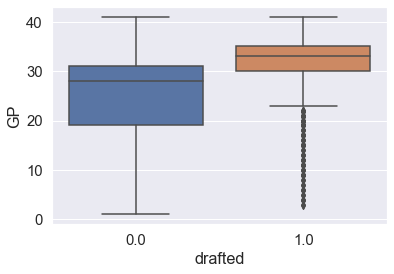

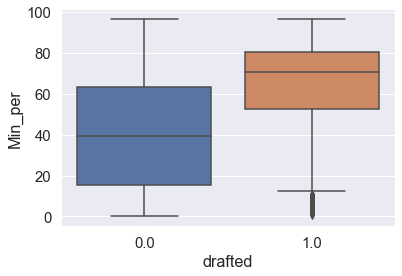

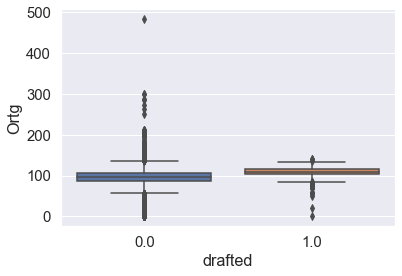

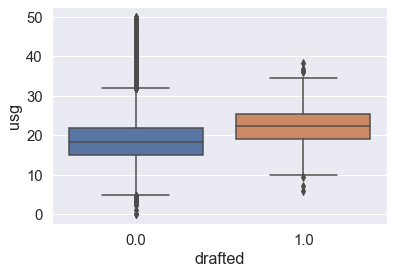

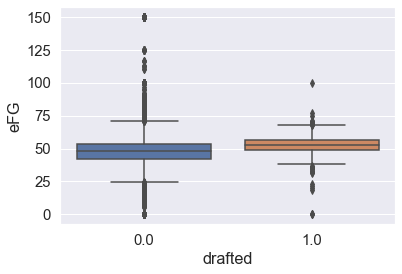

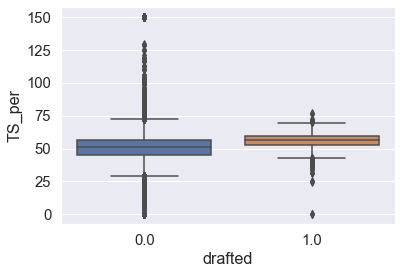

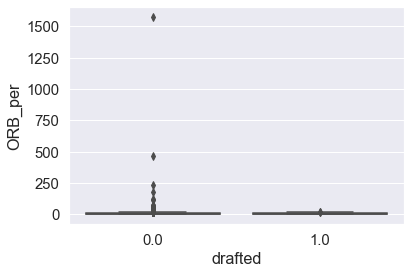

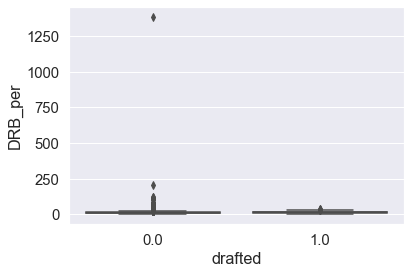

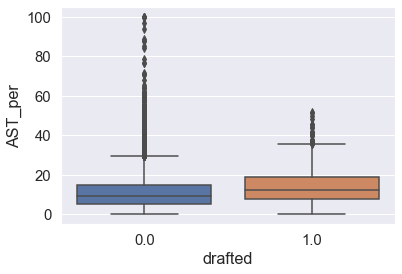

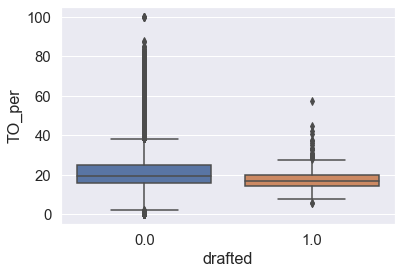

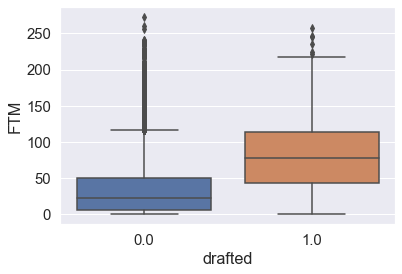

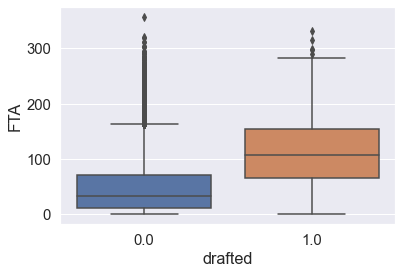

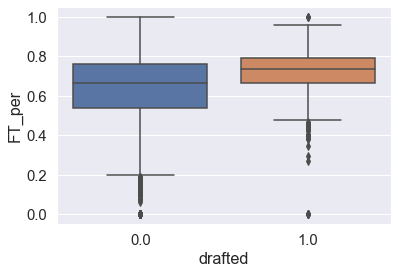

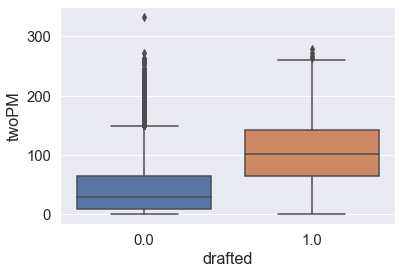

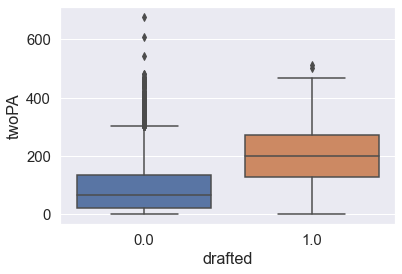

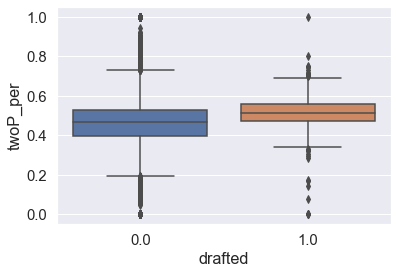

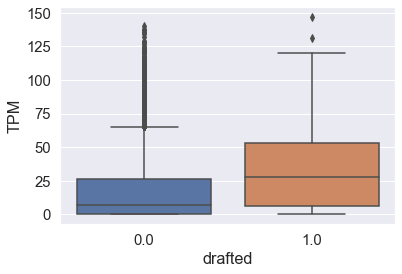

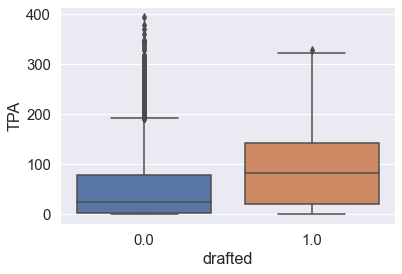

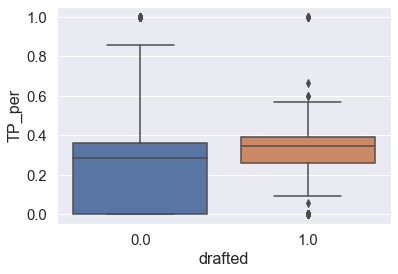

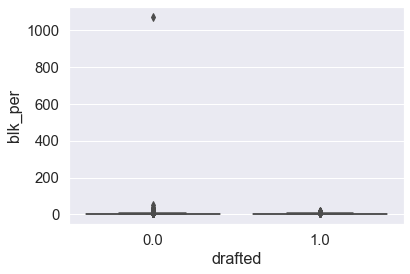

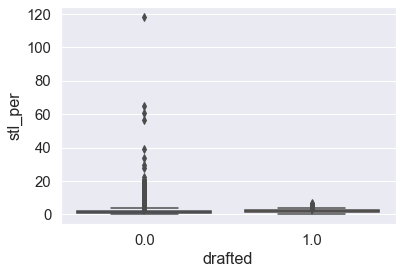

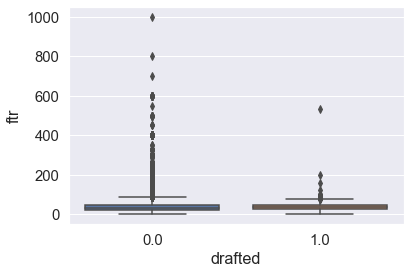

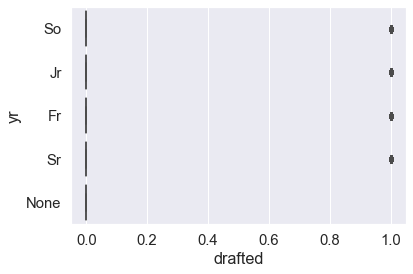

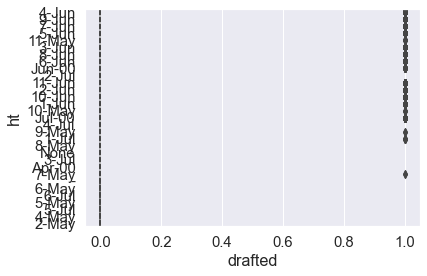

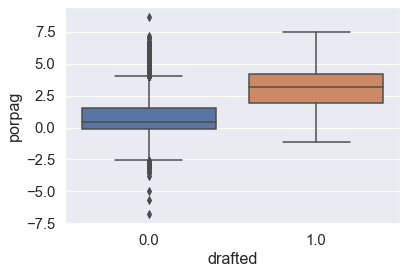

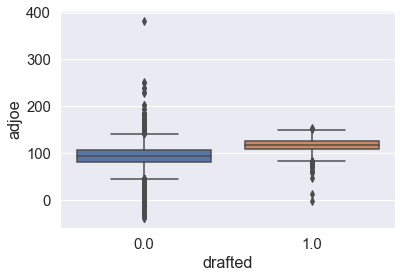

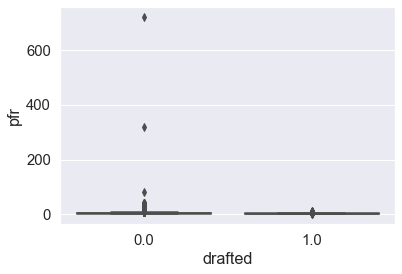

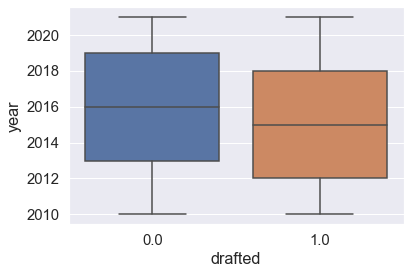

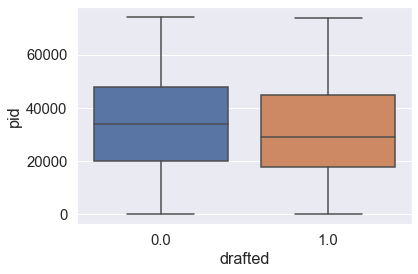

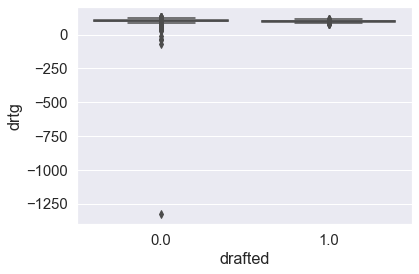

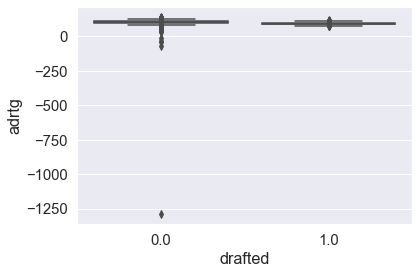

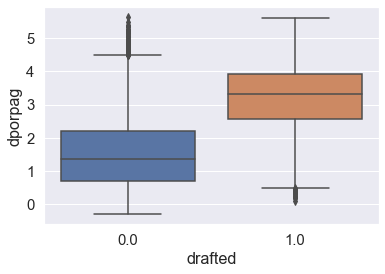

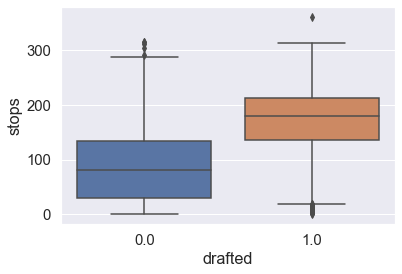

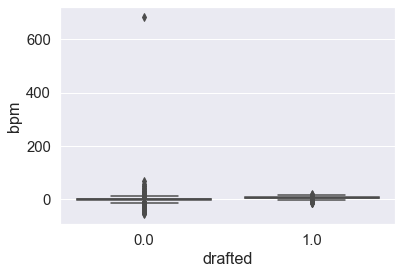

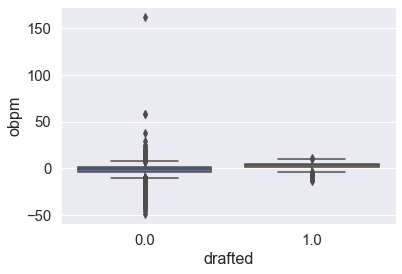

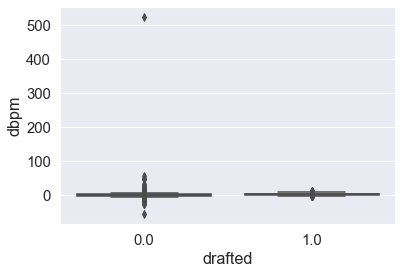

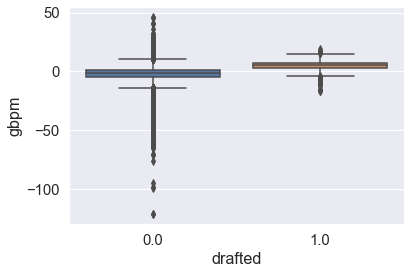

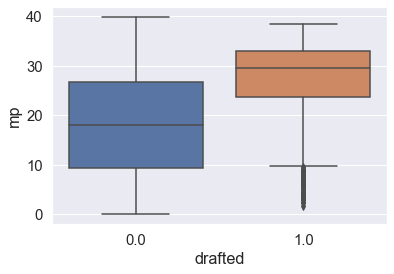

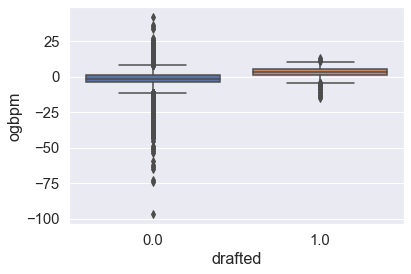

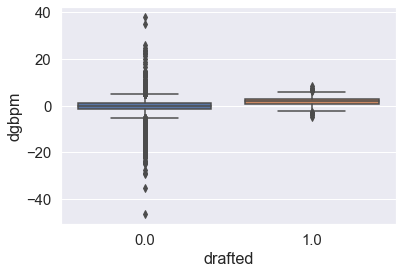

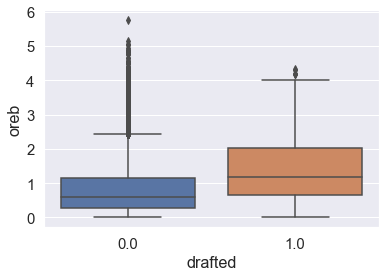

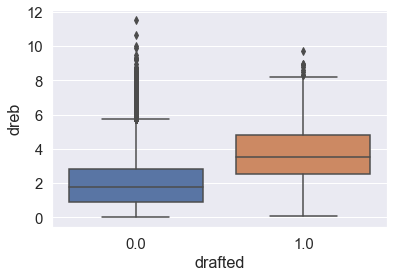

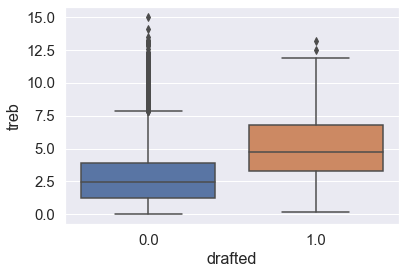

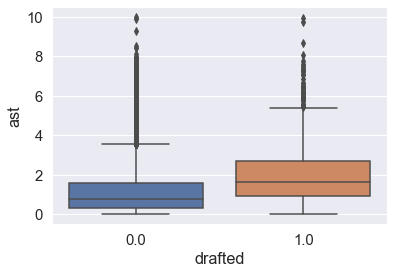

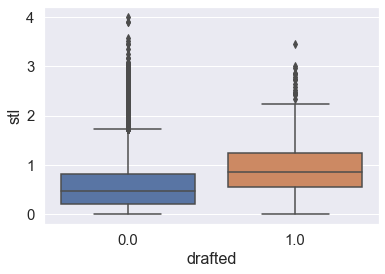

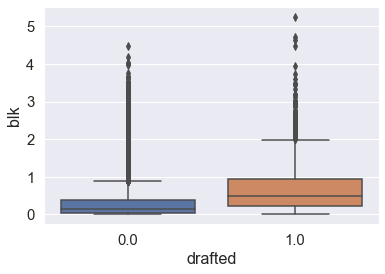

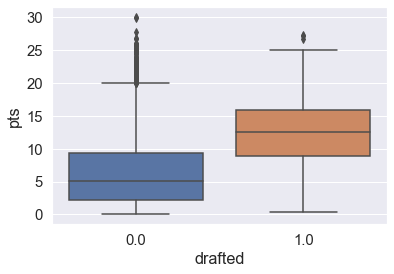

In [75]:
#eda of numeric vars
lst_num = list(training.columns)
lst_num.remove('conf')

train = pd.concat([training, y_train], axis=1)

for i in range(len(lst_num)):
    sns.boxplot(data = train, x = 'drafted', y = lst_num[i])
    plt.show()


In [61]:
training

,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
42019,Slnd,12,0.7,129.1,23.3,50.0,58.39,15.4,16.0,0.0,...,3.017970,6.224450,0.0625,0.1250,0.1875,0.0625,0.0625,0.0000,0.4375,0.0
47027,SB,31,60.4,86.3,23.3,39.1,44.37,9.0,18.7,10.4,...,-3.493030,-1.982040,2.0938,4.0938,6.1875,1.2812,0.4688,0.1875,8.6875,0.0
47852,MVC,22,66.9,110.0,13.6,62.5,65.42,3.7,15.5,1.8,...,-0.429655,0.365963,0.8333,3.7917,4.6250,0.3333,0.4167,0.2917,7.3750,0.0
25311,MAC,29,72.6,102.0,14.8,50.2,52.81,2.0,7.2,8.4,...,-1.015130,-1.394700,0.5172,1.9655,2.4828,1.2759,0.4138,0.3448,8.1034,0.0
3627,MAAC,6,1.0,104.5,24.2,50.0,54.47,0.0,15.9,13.3,...,-4.708650,0.281618,0.0000,0.3333,0.3333,0.1667,0.0000,0.0000,1.1667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,BSky,28,41.8,93.2,12.9,46.8,47.51,8.3,9.5,3.0,...,-4.424570,-0.742438,1.2333,1.2667,2.5000,0.3000,0.3667,0.6667,3.1667,0.0
30865,CUSA,31,60.2,97.1,25.2,41.3,47.12,2.6,18.5,9.6,...,-0.793253,-0.101675,0.5806,3.7419,4.3226,1.0000,0.5161,0.1935,10.7742,0.0
23841,Ivy,21,13.4,59.3,20.5,22.2,31.43,2.3,13.5,14.2,...,-8.096670,-3.334930,0.1739,1.0000,1.1739,0.5652,0.0435,0.1304,1.8261,0.0
15263,Slnd,10,11.6,95.4,18.7,39.5,45.91,8.6,16.0,20.8,...,-0.515066,2.685350,1.1000,2.2000,3.3000,1.4000,0.8000,0.6000,4.1000,0.0


In [ ]:
#based on EDA, I should
    #def keep 
        #FTM, GP, Min_per, usg, TO_per, FTA, FT_per(?), twoPM, twoPA, twoP_per(?), TPM, TPA, TP_per, porpag, 
        #adjoe, year, dporpag, stops, mp, oreb, dreb, treb, ast, stl, blk, pts
    #maybe keep
        #Ortg?, eFG?, TS_Per??, AST_per ?????, 
    #def remove
        #ORB_per, DRB_per, blk_per, stl_per, ftr, yr, ht, pfr, pid, drtg, adrtg, bpm obpm dbpm gbpm  ogbpm dgbpm

In [76]:
#remove predictors 
lst_to_remove = ['ORB_per', "DRB_per", "blk_per", "stl_per", "ftr", "yr", "ht", "pfr", "pid", "drtg", "adrtg",
                "bpm", "obpm", "dgbpm", "Ortg", "eFG", "TS_per", "AST_per"]

predictors = list(training.columns)

predictors.remove('ORB_per')
predictors.remove('DRB_per')
predictors.remove('blk_per')
predictors.remove('stl_per')
predictors.remove('ftr')
predictors.remove('yr')
predictors.remove('ht')
predictors.remove('pfr')
predictors.remove('pid')
predictors.remove('drtg')
predictors.remove('adrtg')
predictors.remove('bpm')
predictors.remove('obpm')
predictors.remove('dgbpm')
predictors.remove('Ortg')
predictors.remove('eFG')
predictors.remove('TS_per')
predictors.remove('AST_per')

In [79]:
#dropping the vars from training df
training1 = training.drop(columns = lst_to_remove)

#making for-loop of predictors to make a string for the logit model
str_of_preds = "conf"

for i in range(len(predictors) - 1):
    str_of_preds = str_of_preds + "+" + predictors[i + 1]
    
str_of_preds

'conf+GP+Min_per+usg+TO_per+FTM+FTA+FT_per+twoPM+twoPA+twoP_per+TPM+TPA+TP_per+porpag+adjoe+year+dporpag+stops+dbpm+gbpm+mp+ogbpm+oreb+dreb+treb+ast+stl+blk+pts'

In [83]:
#check 4 multicollinearity
#literally don'y know what is happening
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = training1[predictors]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [85]:
training2 = pd.concat([training1, y_train], axis=1)

logit_model = smf.logit(formula = 'drafted~' + str_of_preds, data = training2).fit() #Developing logistic regression model

         Current function value: inf
         Iterations: 35


C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
#let's try slimming it down more ig
training2.corrwith(training2.drafted).sort_values(ascending = False)

drafted     1.000000
porpag      0.265118
dporpag     0.255060
twoPM       0.228671
twoPA       0.214416
FTM         0.213099
stops       0.211185
FTA         0.209588
pts         0.194368
dreb        0.187157
gbpm        0.186280
treb        0.178792
adjoe       0.169654
ogbpm       0.169168
blk         0.159948
mp          0.144168
Min_per     0.143168
GP          0.131460
oreb        0.130266
stl         0.129071
ast         0.121665
TPM         0.120186
TPA         0.114017
usg         0.112083
dbpm        0.112055
FT_per      0.066198
twoP_per    0.065575
TP_per      0.055994
year       -0.029965
TO_per     -0.068707
dtype: float64

In [96]:
lst_to_remove = ['TO_per', 'year', 'TP_per', 'twoP_per', 'FT_per']

predictors = list(training2.columns)
predictors.remove('TO_per')
predictors.remove('year')
predictors.remove('TP_per')
predictors.remove('twoP_per')
predictors.remove('FT_per')
predictors.remove('conf')

#dropping the vars from training df
training3 = training2.drop(columns = lst_to_remove)

#making for-loop of predictors to make a string for the logit model
str_of_preds = "conf"

for i in range(len(predictors) - 1):
    str_of_preds = str_of_preds + "+" + predictors[i]
    
str_of_preds

'conf+GP+Min_per+usg+FTM+FTA+twoPM+twoPA+TPM+TPA+porpag+adjoe+dporpag+stops+dbpm+gbpm+mp+ogbpm+oreb+dreb+treb+ast+stl+blk+pts'

In [97]:
logit_model = smf.logit(formula = 'drafted~' + str_of_preds, data = training3).fit() 

         Current function value: inf
         Iterations: 35


C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
